* Grid Search
* train_test_spilt
* Scaler

In [5]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [7]:
X = digits.data
X.shape

(1797, 64)

In [8]:
y = digits.target
y.shape

(1797,)

In [9]:
some_digit=X[666]

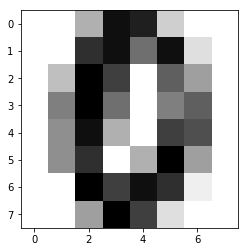

In [10]:
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()

In [11]:
from playML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
from playML.kNN import KNNClassifier
clr = KNNClassifier(k=4)

In [13]:
clr.fit(X_train, y_train)

KNN(k=4)

In [30]:
y_predict = clr.predict(X_test)

In [31]:
correct = sum(y_predict == y_test)
correct

357

In [32]:
ratio = correct/len(y_test)

In [33]:
ratio

0.9916666666666667

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
clr = KNeighborsClassifier(n_neighbors=4)

In [27]:
clr.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [28]:
y_predict = clr.predict(X_test)
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_predict, y_test)

0.9916666666666667

In [35]:
param_grid =[{
        'weights':["uniform"],
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }]


In [50]:
knn_clf = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)

In [51]:
%%time
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.5s


Wall time: 52.3 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   50.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [42]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance')

In [43]:
grid_search.best_score_

0.9853862212943633

In [44]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [46]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_test, y_test)

0.9833333333333333

In [59]:
x = np.random.randint(0, 100, (50,2))
x = np.array(x,dtype=float)
x[:,0] = (x[:,0] - np.mean(x[:,0]))/np.std(x)
x[:,1] = (x[:,1] - np.mean(x[:,1]))/np.std(x)

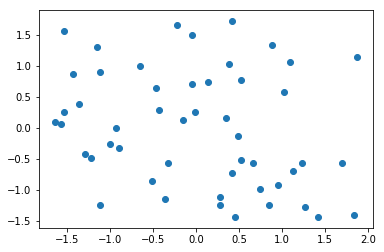

In [60]:
plt.scatter(x[:,0],x[:,1])

In [64]:
np.std(x[:,1])

0.9313383343977872

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
stdSca = StandardScaler()
stdSca.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
stdSca.mean_

array([0.00000000e+00, 3.15240084e-01, 5.22338205e+00, 1.18733473e+01,
       1.18030619e+01, 5.77174669e+00, 1.40709812e+00, 1.48921364e-01,
       4.87125957e-03, 1.91788448e+00, 1.03096729e+01, 1.19860821e+01,
       1.02651357e+01, 8.03131524e+00, 1.85455811e+00, 1.23869172e-01,
       2.08768267e-03, 2.54766875e+00, 9.88239388e+00, 7.04592902e+00,
       7.07446068e+00, 7.70702853e+00, 1.76478775e+00, 5.14961726e-02,
       6.95894224e-04, 2.48155880e+00, 9.21642310e+00, 8.95963814e+00,
       9.94015310e+00, 7.55741127e+00, 2.28810021e+00, 2.08768267e-03,
       0.00000000e+00, 2.35003479e+00, 7.67501740e+00, 9.07863605e+00,
       1.02922756e+01, 8.70354906e+00, 2.87265136e+00, 0.00000000e+00,
       4.87125957e-03, 1.53305498e+00, 6.83298539e+00, 7.16771051e+00,
       7.67710508e+00, 8.13639527e+00, 3.41684064e+00, 2.99234516e-02,
       3.47947112e-03, 6.84064022e-01, 7.48503827e+00, 9.61795407e+00,
       9.41127349e+00, 8.72442589e+00, 3.69589422e+00, 2.08768267e-01,
      

In [70]:
stdSca.transform(X_train)

array([[ 0.        , -0.33530066,  0.16222024, ..., -0.46372633,
        -0.51256107, -0.1985345 ],
       [ 0.        ,  0.7283352 , -0.46442084, ...,  1.21818871,
        -0.51256107, -0.1985345 ],
       [ 0.        , -0.33530066, -0.04666012, ...,  1.21818871,
         0.2126279 , -0.1985345 ],
       ...,
       [ 0.        ,  2.85560693,  2.04214349, ...,  0.8818057 ,
         0.2126279 , -0.1985345 ],
       [ 0.        , -0.33530066, -0.88218157, ...,  0.04084818,
        -0.51256107, -0.1985345 ],
       [ 0.        , -0.33530066,  0.78886132, ..., -1.13649235,
        -0.51256107, -0.1985345 ]])